In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

from utils import *
from plot_utils import *
from AnalyseDefects_dev import AnalyseDefects
from AnalyseDefectsAll import AnalyseDefectsAll

In [2]:
data_suffix='lbc' #'lambda_minus1'
LL = 512
mode = 'all' # 'all' or 'short'

extract = False
analyze = False
merge = False

if data_suffix == 'lk':
    prefix_list = []
    suffix_list = ['025', '10']
    Nframes_list = [400, 400] 
    count_suffix = "_periodic_rm0.1"
    label_list = [r'$K = 0.025$', 
                  r'$K = 0.05$',
                  r'$K = 0.1$']
elif data_suffix == 'lbc':
    prefix_list = []
    suffix_list = ['3', '4']
    Nframes_list = [400, 400] 
    count_suffix = "_rm0.1"
    label_list = ['free-slip', 'periodic', 'no-slip']
elif data_suffix == 'lam':
    prefix_list = []
    suffix_list = ['05', '2']
    Nframes_list = [100, 100] 
    count_suffix = "_periodic_rm0.1"
    label_list = [r'$\lambda = 0.5$', 
                  r'$\lambda = 1$',
              r'$\lambda = 2$']

output_path = f'data\\na{LL}{data_suffix}'
save_path = os.path.join(output_path, 'figs')
if not os.path.exists(save_path):
    os.makedirs(save_path)

defect_list = []

if len(prefix_list) > 0:
    for i, prefix in enumerate(prefix_list):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{prefix}{data_suffix}', \
                    suffix = 's' if len(prefix) == 0 else prefix, priority = i, LX = LL, Nframes = Nframes_list[i])
        defect_list.append(data_dict)
else:
    for i, suffix in enumerate(suffix_list):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{data_suffix}{suffix}', \
                    suffix = suffix, priority = 0, LX = LL, Nframes =  Nframes_list[i])
        defect_list.append(data_dict)


ad = AnalyseDefects(defect_list, output_path=output_path, count_suffix=count_suffix,)

if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()
if merge:
    ad.merge_results(include_sfac=False)

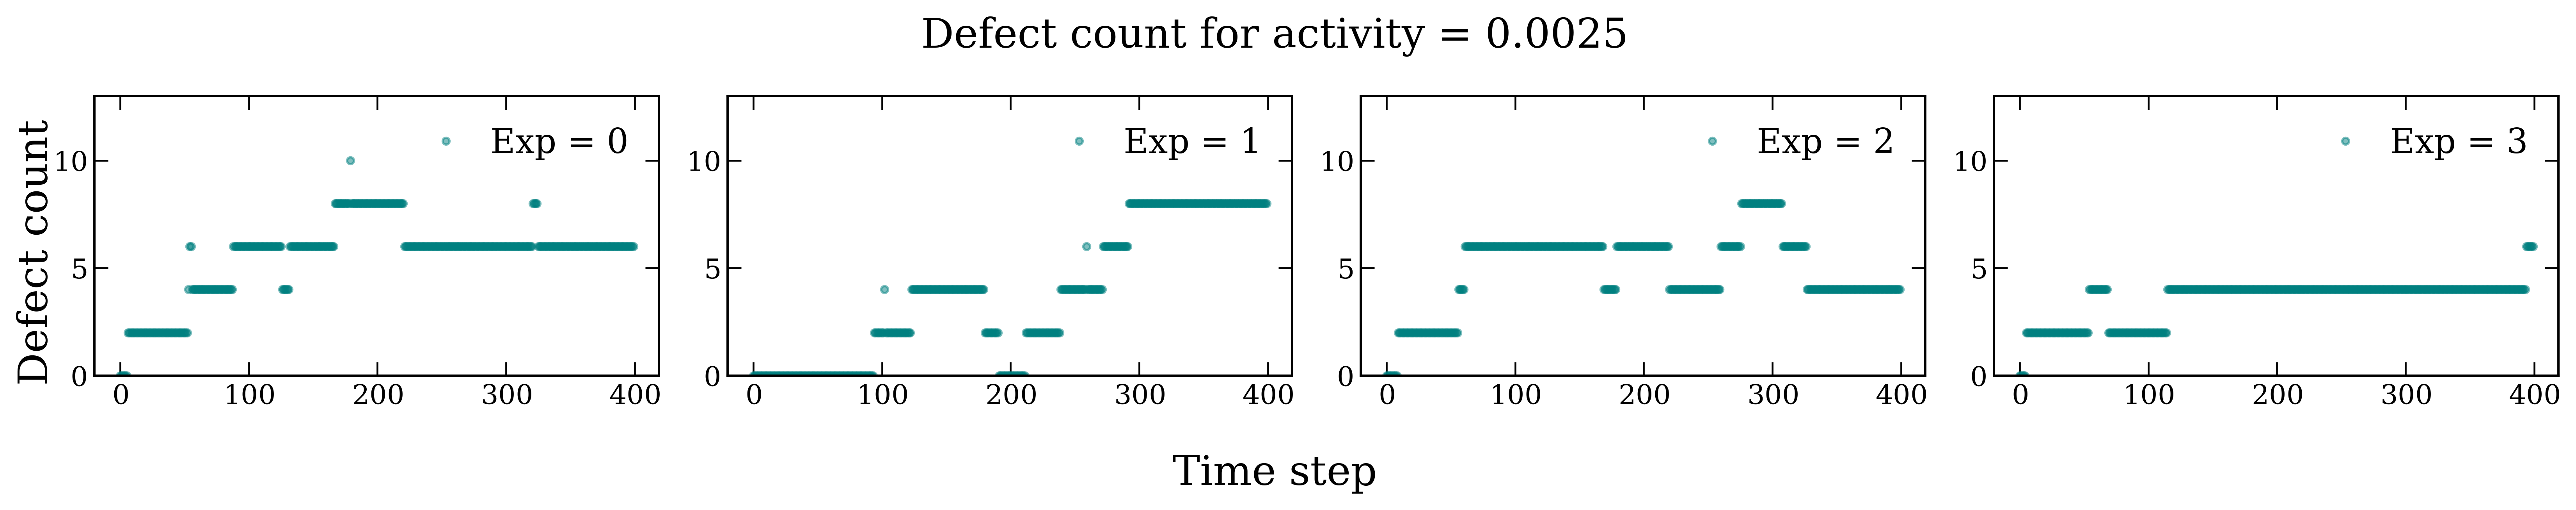

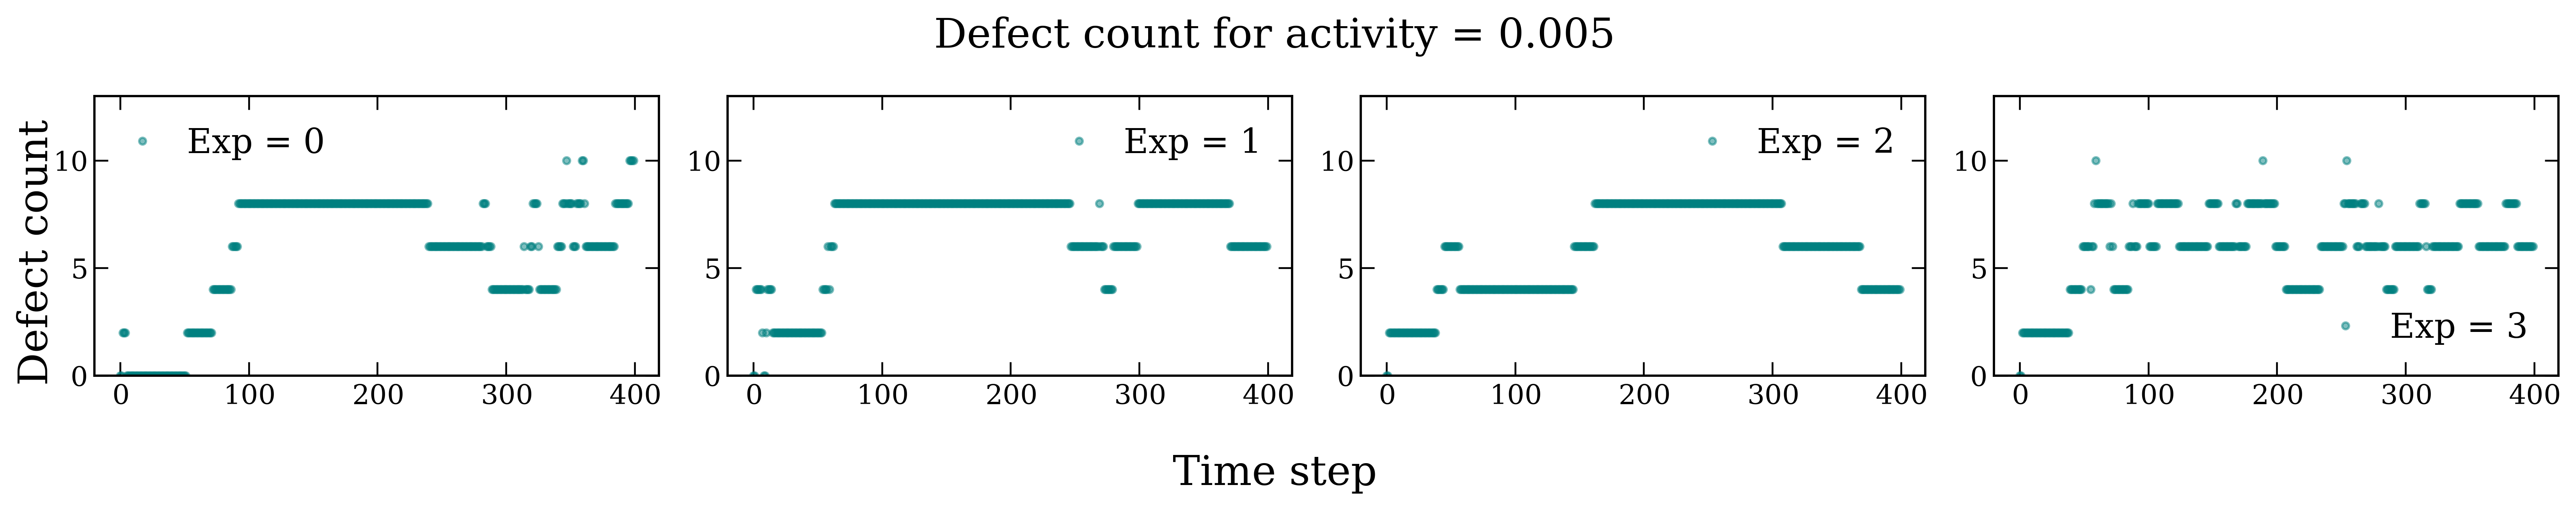

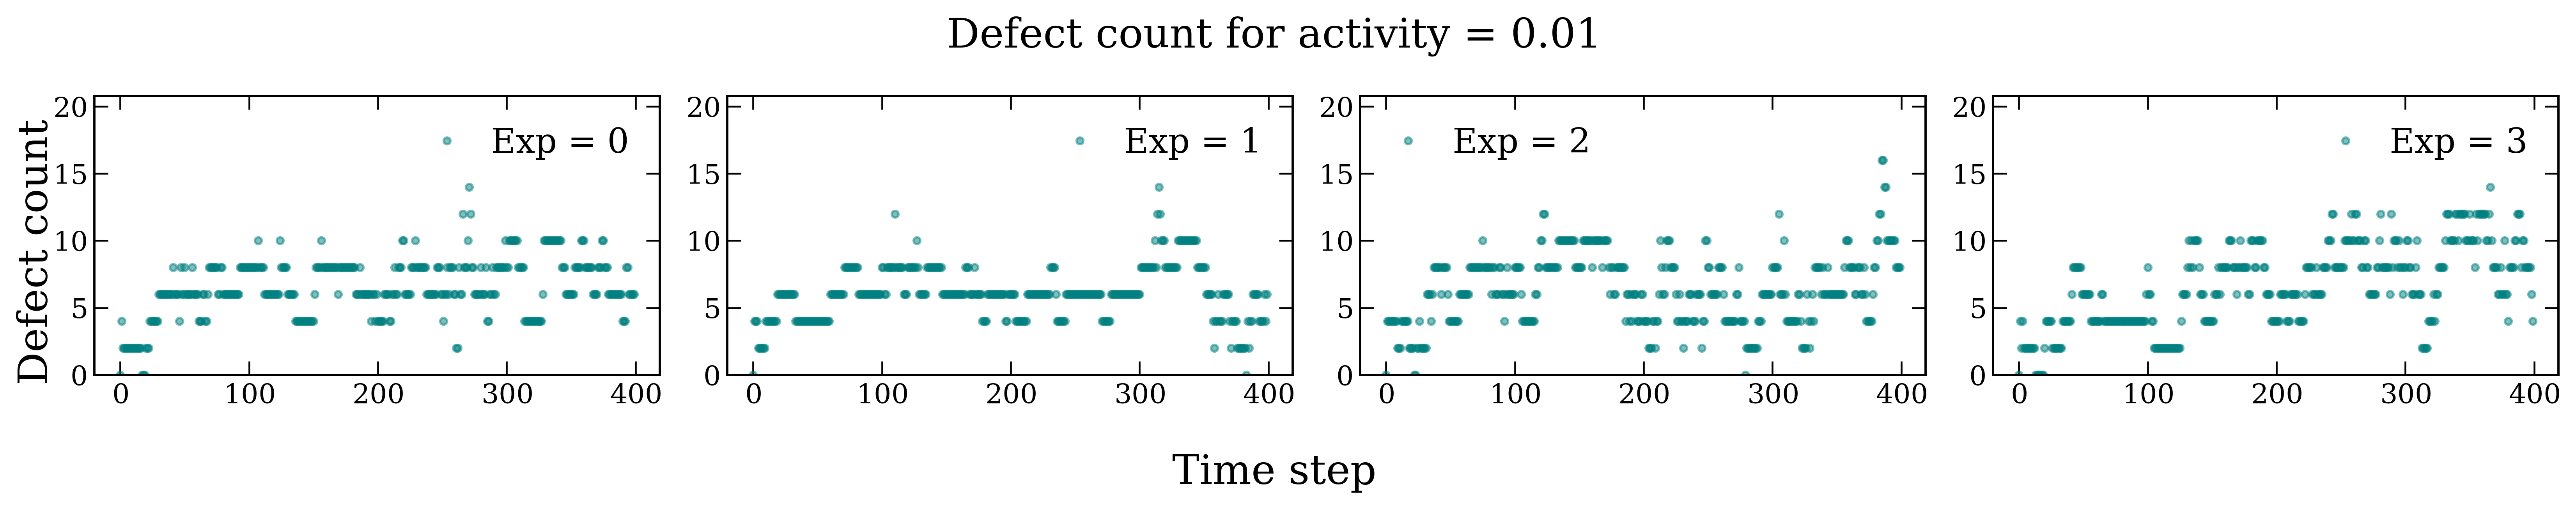

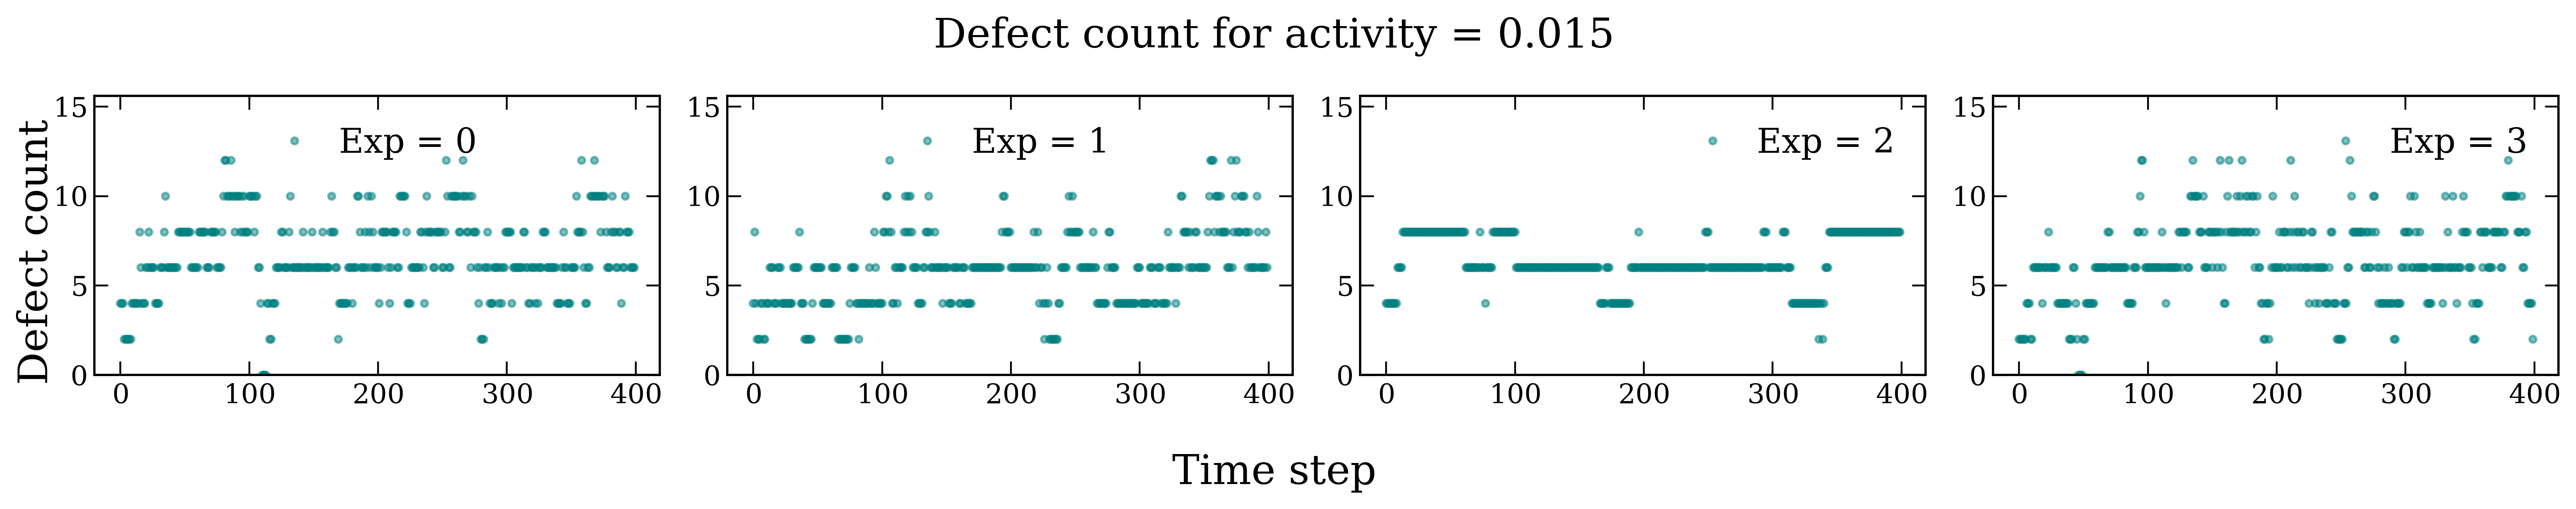

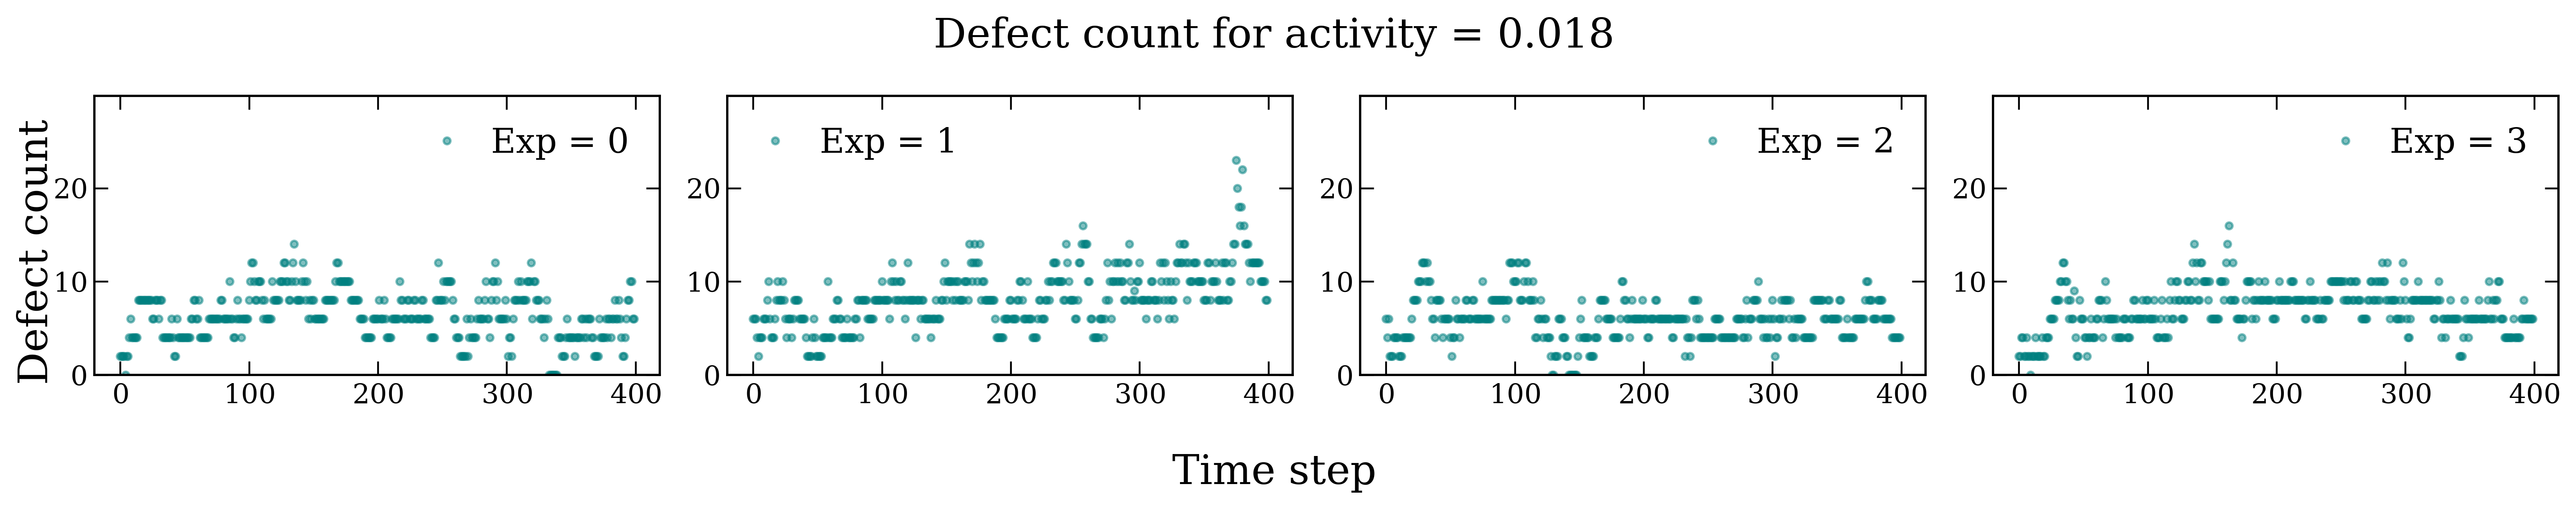

In [3]:
ad.plot_defects_per_exp(-1, act_idx_bounds=[0,5])

In [ ]:
for N in range(ad.Ndata):
    ad.plot_defects_per_activity(N, save=True)

In [ ]:
ad.update_conv_list()

In [22]:
do_extraction = False
do_basic_analysis = False
do_hyperuniformity_analysis = False
do_merge = True
calc_pcf = False


# hyperuniformity parameters
act_idx_bounds=[0,None]
Npoints_to_fit = 20
dens_fluc_dict = dict(act_idx_bounds = [0, None], window_idx_bounds = [50 - Npoints_to_fit, None])

# sfac fitting parameters
pval_min = 0.05
Nbounds = [4,5]
sfac_dict = dict(Npoints_bounds = Nbounds, act_idx_bounds = act_idx_bounds, pval_min = pval_min)

# temporal correlation parameter
temp_corr_simple = True
nlags = None
ff_idx = None
acf_dict = {'nlags_frac': 0.5, 'nlags': nlags, 'max_lag': None,\
                'alpha': 0.3174, 'max_lag_threshold': 0, 'simple_threshold': 0.2, \
                'first_frame_idx': ff_idx}

if do_extraction:
    ad.extract_results()
if do_basic_analysis:
    if do_hyperuniformity_analysis:
        print(' sfac n bounds:', Nbounds)
        
        ad.analyze_defects(temp_corr_simple=temp_corr_simple,
                            acf_dict=acf_dict,
                            dens_fluc_dict=dens_fluc_dict, 
                            sfac_dict=sfac_dict, 
                            calc_pcf=calc_pcf)
    else:
        ad.analyze_defects(acf_dict=acf_dict,
                            temp_corr_simple=temp_corr_simple)
if do_merge:
    ad.merge_results()

In [3]:
LL = 512
output_path_ref = f'data\\na{LL}'
mode_ref = 'all' # 'all' or 'short'

defect_list_ref = gen_analysis_dict(LL, mode_ref)
ad2 = AnalyseDefects(defect_list_ref, output_path=output_path_ref)


In [10]:
ad.get_arrays_av[0][-1]

TypeError: 'method' object is not subscriptable

In [ ]:
## plot av. defect density 
act_list_list = [ad.act_list[0], ad2.act_list[0], ad.act_list[1]]
av_defect_list = [ad.get_arrays_av[0][-1], ad2.get_arrays_av(use_merged=True)[-1], ad.get_arrays_av[1][-1]]
marker_list = ['ro', 'bs', 'gd']
fig, ax = plt.subplots(figsize=(6, 4))


for i, label in label_list:
    av_def = av_defect_list[i]
    ax.errorbar(act_list_list[i], av_def[:,0], av_def[:,1], fmt = marker_list[i], elinewidth=1.5, capsize=1.5, capthick=1, markersize = 4)

ax.set_xlabel(r'Activity ($\zeta$)')
ax.set_ylabel(r' Av. defect density ($\overline{\rho})$')
ax.legend()
fig.savefig(os.path.join(save_path, 'av_density.png'), dpi=420, bbox_inches='tight')

TypeError: 'method' object is not subscriptable

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 4))

marker_list = ['ro', 'bs', 'gd']
for N in range(ad.Ndata):
    act = ad.act_list[N]
    sus = ad.get_susceptibility(N)
    ax.errorbar(act, sus[:,0], sus[:,1], label=label_list[N], fmt = marker_list[i], elinewidth=1.5, capsize=1.5, capthick=1, markersize = 4)
ax.legend()
fig_path = os.path.join(ad.output_main_path, 'figs',)
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig.savefig(os.path.join(fig_path, 'av_density.png'), dpi=420, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 4))

for N in range(ad.Ndata):
    act = ad.act_list[N]
    sus = ad.get_susceptibility(N)
    ax.errorbar(act, sus[:,0], sus[:,1], label=label_list[N])
ax.legend()
fig.savefig(os.path.join(ad.output_main_path, 'figs', 'susceptibility.png'), bbox_inches='tight')

In [ ]:
bc_names = ['free', 'bound', 'periodic']
for i, act_list in enumerate(ad.act_list):
  
    av_dens = ad.get_arrays_av(i)[-1] / ad.LX[i]**2
    if i==0 and data_suffix=='fric01':
        av_dens = av_dens[5:]
        act_list = act_list[5:]
    plt.errorbar(act_list, av_dens[:,0], av_dens[:,1],color='blue',fmt='x', alpha=.4,
                 label = 'Friction: 0.01' if i==0 else None)# label=f'BC : {bc_names[i]}')

act_ref = np.load(os.path.join(ad2.output_main_path, 'merged_results', 'activity_list.npy'))
av_dens_ref = ad2.get_arrays_av(use_merged=True)[-1] / ad2.LX[0]**2

plt.errorbar(act_ref, av_dens_ref[:,0], yerr=av_dens_ref[:,1], label='Friction: 0', color='black', fmt='o', alpha=.4)

plt.legend()
plt.ylabel('Defect density')
plt.xlim(xmin=.01, xmax=0.05)
plt.xlabel('Activity')
plt.savefig(os.path.join(save_path, 'av_dens.png'), dpi=520)

In [ ]:
for i, act_list in enumerate(ad.act_list):
    sus = ad.get_susceptibility(i)
    if i==0 and data_suffix=='fric01':
        sus = sus[5:]
        act_list = act_list[5:]
    plt.errorbar(act_list, sus[:,0], sus[:,1], label = 'Friction: 0.01' if i==0 else None,# label=f'BC : {bc_names[i]}',
                  fmt='o',alpha=.5, ms=8, color='blue')

act_ref = np.load(os.path.join(ad2.output_main_path, 'merged_results', 'activity_list.npy'))
sus_ref = ad2.get_susceptibility(use_merged=True)
plt.errorbar(act_ref, sus_ref[:,0], yerr=sus_ref[:,1], label=f'Friction: 0', #BC : {bc_names[-1]}', 
             color='black', fmt='*', alpha=.5, ms=8)
plt.legend()
plt.ylabel('Susceptibility')
plt.xlim(xmax=0.05)
plt.xlabel('Activity')

plt.savefig(os.path.join(save_path, 'susceptibility.png'), dpi=520)

In [ ]:
for i, act_list in enumerate(ad.act_list):

   # plt.errorbar(act_list, sus[:,0], sus[:,1], label=f'K = {ad.suffixes[i]}')
    fit_params = np.load(f'{ad.output_paths[i]}\\fit_params_count.npy')
    if i==0 and data_suffix=='fric01':
        act_list = act_list[5:]
        fit_params = fit_params[5:] 

    plt.errorbar(act_list, fit_params[:,0], yerr=fit_params[:,2],
                 label=f'fric 01' if i == 0 else None,#BC : {bc_names[i]}',
                  fmt='o',alpha=.5, ms=8, color='blue')

act_ref = np.load(os.path.join(ad2.output_main_path, 'merged_results', 'activity_list.npy'))
params_ref = np.load(os.path.join(ad2.output_main_path, 'merged_results', 'fit_params_count.npy'))
plt.errorbar(act_ref, params_ref[:,0], yerr=params_ref[:,2], 
                 label=f'ref',
                  fmt='x',alpha=.5, ms=8)
#ad2.get_susceptibility(use_merged=True)
#plt.errorbar(act_ref, sus_ref[:,0], yerr=sus_ref[:,1], label='K = 0.05', color='black', )
#plt.legend()
#plt.ylabel('Susceptibility')
plt.xlim(xmax=0.04)

plt.ylabel('Hyperuniformity exponent')
plt.xlabel('Activity')
plt.legend()
plt.savefig(os.path.join(save_path, 'alpha.png'), dpi=520)
